# Week 2


# Chapter 5 statistics

* Mean and median  
Two centrality estimators
the mean estimates the mean value of the set
The median is the middle element (50 percentile)

* Variance  
Variance expresses dispersion of data

* Simpsons paradox  
in which a trend appears in different groups of data but disappears or reverses when these groups are combined. It is sometimes given the impersonal title reversal paradox or amalgamation paradox.  
Often seen in social sciences

* Correlation and causation  
Correlation does not imply causation, but the opposite is often true.


## Get data

In [106]:
import urllib2
import numpy as np

def read_float_tsv(data):
    t = [];
    for line in data.split("\n"):
        t.append([float(x) for x in line.split("\t")])
    return t

response = urllib2.urlopen("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv")
data1 = np.array(read_float_tsv(response.read()))
response = urllib2.urlopen("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv")
data2 = np.array(read_float_tsv(response.read()))
response = urllib2.urlopen("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv")
data3 = np.array(read_float_tsv(response.read()))
response = urllib2.urlopen("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv")
data4 = np.array(read_float_tsv(response.read()))


### Calculating means

In [93]:
print "Mean of data1 columns 1"
print np.mean(data1[:,1])

Mean of data1 columns 1
7.50090909091


In [123]:
print "mean of columns in data 2"
for i in range(0,2):
    print "{:3.2f}".format(np.mean(data2[:,i]))

mean of columns in data 2
9.00
7.50


### plotting

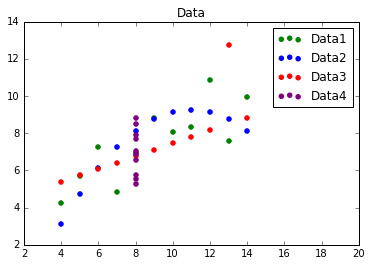

In [147]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.scatter(data1[:,0],data1[:,1], color='green')
plt.title("Data")

#plt.hold()
plt.scatter(data2[:,0],data2[:,1], color='blue')
plt.scatter(data3[:,0],data3[:,1], color='red')
plt.scatter(data4[:,0],data4[:,1], color='purple')
plt.legend(["Data1", "Data2", "Data3", "Data4"])
plt.show()

#### Calculate variance of dataset columns

In [138]:

print ["{:3.3f}".format(x) for x in np.var(data1, axis=0)]
print ["{:3.3f}".format(x) for x in np.var(data2, axis=0)]
print ["{:3.3f}".format(x) for x in np.var(data3, axis=0)]
print ["{:3.3f}".format(x) for x in np.var(data4, axis=0)]

['10.000', '3.752']
['10.000', '3.752']
['10.000', '3.748']
['10.000', '3.748']


In [145]:
print data1[:,0]
print data2[:,0]
print data3[:,0]
print data4[:,0]

[ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.]
[ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.]
[ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.]
[  8.   8.   8.   8.   8.   8.   8.  19.   8.   8.   8.]


In [164]:
nx = 1
ny = 1
for x in [data1, data2, data3, data4]:
    for y in [data1, data2, data3, data4]:
        print "correlation coeff between data%s and data%s" % (nx, ny) 
        print np.corrcoef(x[:,1], y[:,1])[0, 1]
        ny += 1
    ny = 1
    nx += 1

correlation coeff between data1 and data1
1.0
correlation coeff between data1 and data2
0.750005396958
correlation coeff between data1 and data3
0.468716678659
correlation coeff between data1 and data4
-0.489116223766
correlation coeff between data2 and data1
0.750005396958
correlation coeff between data2 and data2
1.0
correlation coeff between data2 and data3
0.587919327108
correlation coeff between data2 and data4
-0.478094850884
correlation coeff between data3 and data1
0.468716678659
correlation coeff between data3 and data2
0.587919327108
correlation coeff between data3 and data3
1.0
correlation coeff between data3 and data4
-0.155471787097
correlation coeff between data4 and data1
-0.489116223766
correlation coeff between data4 and data2
-0.478094850884
correlation coeff between data4 and data3
-0.155471787097
correlation coeff between data4 and data4
1.0


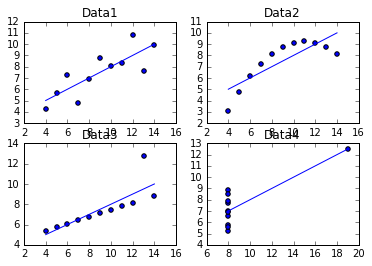

In [189]:
from scipy import stats
nx = 1
for data in [data1, data2, data3, data4]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,0],data[:,1])
    #print [slope, intercept, r_value, p_value, std_err]
    plt.subplot(2,2,nx)
    plt.scatter(data[:,0], data[:,1])
    plt.plot(np.sort(data[:,0]), [slope*x + intercept for x in np.sort(data[:,0])])
    plt.title("Data%i" % nx)
    nx += 1

Purpose was to get familiar with numpy, and learn to plot first, to show what data we are working with

# Chapter 6 - Statistics

In [190]:
import random
from __future__ import division

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid() 
    older = random_kid() 
    
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls / older_girl # 0.514 ~ 1/2 
print "P(both | either): ", both_girls / either_girl # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


In [284]:
def random_kid():
    return random.choice(["boy", "girl"])
simulations = 10000

girls = [0,0,0,0]
older_girl = 0

random.seed(0)
for _ in range(simulations):
    kids = [random_kid(), random_kid(), random_kid()]
    #print kids
    n =  sum(kid == "girl" for kid in kids)
    girls[n] += 1
    
    if kids[1] == "girl":
        older_girl += 1
    
print "P(three_girls):", girls[3] / simulations # 0.125 ~ 1 chance in 2^3 
print "P(two_girls):", girls[2] / simulations # 0.375 ~ 3/2^8
print "P(one_girls):", girls[1] / simulations # 0.375 ~ 3/2^8
print "P(zero_girls):", girls[0] / simulations # 0.125 ~ 1/2^3 
print "P(All_girls | oldest is a girl):", girls[3] / older_girl # 0.25 ~ intersection all_girls and oldest is girl = 0.125 / oldest is a girl = 0.5  
print "P(All_girls | any is a girl):", girls[3] / sum(girls[1:4]) # 0.1429 ~ intersection all_girls and any is girl = 0.125/ any is girl 7/2^3
#print "P(both | either): ", both_girls / either_girl # 0.342 ~ 1/3

P(three_girls): 0.1249
P(two_girls): 0.3782
P(one_girls): 0.3771
P(zero_girls): 0.1198
P(All_girls | oldest is a girl): 0.248359514814
P(All_girls | any is a girl): 0.14189956828


Conditional probability
$$P(A|B) = \frac{P\left(A \bigcap B\right)}{P(B)}$$

## Central limit theorem

In [324]:
random(10)

TypeError: 'module' object is not callable

([<matplotlib.axis.XTick at 0x7f24737b1190>,
 <a list of 6 Text xticklabel objects>)

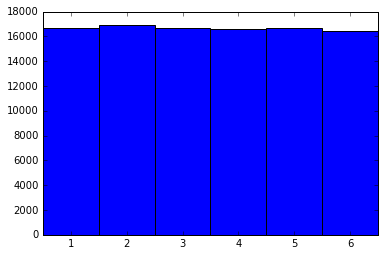

In [362]:
from collections import Counter
# Roll a dice
def dicesim(rolls):
    for x in range(rolls):
        yield random.randint(1,6)

bin, value = zip(*Counter(dicesim(100000)).items())
indexes = np.arange(len(bin))
plt.bar(bin,value,1)
plt.xticks(indexes + 1.5, bin)

Its a **Uniformly** distributed :)

Next the average of 10 dice is **Normal distributed** as per the centrality theorem

(array([   137.,   1376.,   6744.,  17781.,  27603.,  25935.,  14659.,
          4811.,    882.,     72.]),
 array([ 1.5 ,  1.91,  2.32,  2.73,  3.14,  3.55,  3.96,  4.37,  4.78,
         5.19,  5.6 ]),
 <a list of 10 Patch objects>)

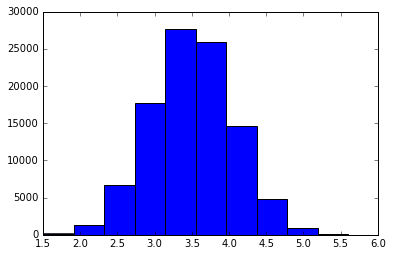

In [455]:
plt.hist([sum(dicesim(10))/10.0 for i in range(100000)])

In [449]:
hist

(array([1, 0, 0, 2, 2, 1, 2, 0, 0, 2]),
 array([ 3.  ,  3.16,  3.32,  3.48,  3.64,  3.8 ,  3.96,  4.12,  4.28,
         4.44,  4.6 ]))

In [ ]:
sims = 1000
buf = np.zeros(6)
for i in range(1000):
    d = Counter(dicesim(10))
    for i in d.keys():
        buf[i-1] = buf[i-1] + d[i]
average = np.array([x/float(sims) for x in buf])
plt.bar(range(1,7),average,1)